In [1]:
from mlagents_envs.environment import UnityEnvironment
from mlagents_envs.side_channel.engine_configuration_channel import EngineConfigurationChannel
import numpy as np
import collections
from matplotlib import pyplot as plt
from dqn_agent import Agent
import torch

In [2]:
channel = EngineConfigurationChannel()
env = UnityEnvironment(file_name="D:/pc/unity envs/prj.4.1.0/prj.4.0.0.exe", seed=0, side_channels=[channel])
channel.set_configuration_parameters(time_scale = 5.0)
env.reset()
behavior_name = list(env.behavior_specs)[0]
spec = env.behavior_specs[behavior_name]
print(spec)
agent = Agent(state_size=35, action_size=4, seed=0)
save_scores = []

BehaviorSpec(observation_shapes=[(28,), (7,)], action_type=<ActionType.DISCRETE: 0>, action_shape=(4,))


In [3]:
def dqn(n_episodes=5000, max_t=500, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = collections.deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    max_score = -100
    for i_episode in range(1, n_episodes+1):
        env.reset()
        score = 0
        done = False
        for t in range(max_t):
            decision_steps, terminal_steps = env.get_steps(behavior_name)
            for agent_id in decision_steps:
                state_temp = decision_steps[agent_id].obs[0]
                state = np.append (state_temp, decision_steps[agent_id].obs[1])
                actionn = agent.act(state, eps)
                action = actionn.astype(np.int32)
                final_action = np.zeros([1,1])
                final_action[0][0] = action
                env.set_actions(behavior_name, final_action)
                env.step()
                decision_steps_new, terminal_steps_new = env.get_steps(behavior_name)
                for agent_id_new in decision_steps_new:
                    next_state_temp = decision_steps_new[agent_id_new].obs[0]
                    next_state = np.append (next_state_temp, decision_steps_new[agent_id_new].obs[1])
                    reward = decision_steps_new[agent_id_new].reward
                for agent_id_new in terminal_steps_new:
                    next_state_temp = terminal_steps_new[agent_id].obs[0]
                    next_state = np.append (next_state_temp, terminal_steps_new[agent_id].obs[1])
                    reward = terminal_steps_new[agent_id].reward
                    done = True
            agent.step(state, actionn, reward, next_state, done)
            score += reward
            if done:
                break
        scores_window.append(score)  # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if(max_score < score):
            max_score = score
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoints/checkpoint_' + str(int(i_episode/100)+1) + '.pth')
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            save_scores.append(np.mean(scores_window))
            max_score = -100
    return scores

Episode 100	Average Score: -15.65
Episode 200	Average Score: -11.78
Episode 300	Average Score: -4.219
Episode 400	Average Score: 9.259
Episode 500	Average Score: 17.09
Episode 600	Average Score: 13.46
Episode 700	Average Score: 13.43
Episode 800	Average Score: 7.710
Episode 900	Average Score: 8.47
Episode 1000	Average Score: 7.61
Episode 1100	Average Score: 9.378
Episode 1200	Average Score: 10.22
Episode 1300	Average Score: 9.414
Episode 1400	Average Score: 18.78
Episode 1500	Average Score: 16.47
Episode 1600	Average Score: 16.83
Episode 1700	Average Score: 18.43
Episode 1800	Average Score: 22.52
Episode 1900	Average Score: 24.75
Episode 2000	Average Score: 18.19
Episode 2100	Average Score: 29.39
Episode 2200	Average Score: 28.80
Episode 2300	Average Score: 30.41
Episode 2400	Average Score: 35.46
Episode 2500	Average Score: 33.57
Episode 2600	Average Score: 29.44
Episode 2700	Average Score: 29.99
Episode 2800	Average Score: 32.80
Episode 2900	Average Score: 34.88
Episode 3000	Average S

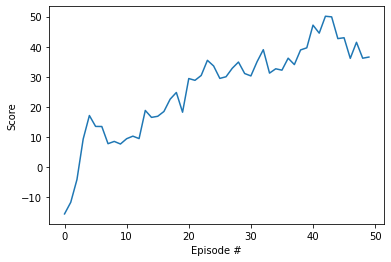

In [4]:
scores = dqn()
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(save_scores)), save_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [3]:
agent.qnetwork_local.load_state_dict(torch.load('checkpoints/checkpoint_43.pth',map_location=torch.device('cpu')))

<All keys matched successfully>

In [4]:
channel.set_configuration_parameters(time_scale = 1.0)
scores = []
eps=0 # list containing scores from each episode
scores_window = collections.deque(maxlen=50)  # last 100 scores
for i_episode in range(1, 100):
        env.reset()
        score = 0
        done = False
        for t in range(200):
            decision_steps, terminal_steps = env.get_steps(behavior_name)
            for agent_id in decision_steps:
                state_temp = decision_steps[agent_id].obs[0]
                state = np.append (state_temp, decision_steps[agent_id].obs[1])
                actionn = agent.act(state, eps)
                action = actionn.astype(np.int32)
                final_action = np.zeros([1,1])
                final_action[0][0] = action
                env.set_actions(behavior_name, final_action)
                env.step()
                decision_steps_new, terminal_steps_new = env.get_steps(behavior_name)
                for agent_id_new in decision_steps_new:
                    next_state_temp = decision_steps_new[agent_id_new].obs[0]
                    next_state = np.append (next_state_temp, decision_steps_new[agent_id_new].obs[1])
                    reward = decision_steps_new[agent_id_new].reward
                for agent_id_new in terminal_steps_new:
                    next_state_temp = terminal_steps_new[agent_id].obs[0]
                    next_state = np.append (next_state_temp, terminal_steps_new[agent_id].obs[1])
                    reward = terminal_steps_new[agent_id].reward
                    done = True
            score += reward
            if done:
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, score))

Episode 1	Average Score: 2.58
Episode 2	Average Score: 58.18
Episode 3	Average Score: 48.01
Episode 4	Average Score: 2.62
Episode 5	Average Score: 43.33
Episode 6	Average Score: 7.73
Episode 7	Average Score: 28.06
Episode 8	Average Score: 88.54
Episode 9	Average Score: 12.92
Episode 10	Average Score: 12.77
Episode 11	Average Score: 2.59
Episode 12	Average Score: 37.74
Episode 13	Average Score: 22.97
Episode 14	Average Score: 12.70
Episode 15	Average Score: 37.95
Episode 16	Average Score: 58.27
Episode 17	Average Score: 17.82
Episode 18	Average Score: 103.60
Episode 19	Average Score: 53.19
Episode 20	Average Score: -12.48
Episode 21	Average Score: 93.52
Episode 22	Average Score: 33.13
Episode 23	Average Score: 48.03
Episode 24	Average Score: 78.33
Episode 25	Average Score: 27.82
Episode 26	Average Score: 73.21
Episode 27	Average Score: 37.92
Episode 28	Average Score: 7.65
Episode 29	Average Score: 53.30
Episode 30	Average Score: 93.37
Episode 31	Average Score: 73.28
Episode 32	Average S

In [5]:
env.close()